In [1]:
#Метод ломаных №17.71

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 0.9) ** 2 + (x - 1.1) ** 4

a = 0.8
b = 1.2
eps = 0.05

#Найдем и изобразим на графике константу Липшица M и точки ломаных
x = np.linspace (a, b, 100)
y = f(x)
M = abs(2 * x + 4 * (x - 1.1) ** 3 - 1.8).max()
print("M= ", M)

M=  0.6039999999999999


Минимум функции f(x) ≈ 0.5233659612516496 при x ≈ 51
Количество итераций: 23


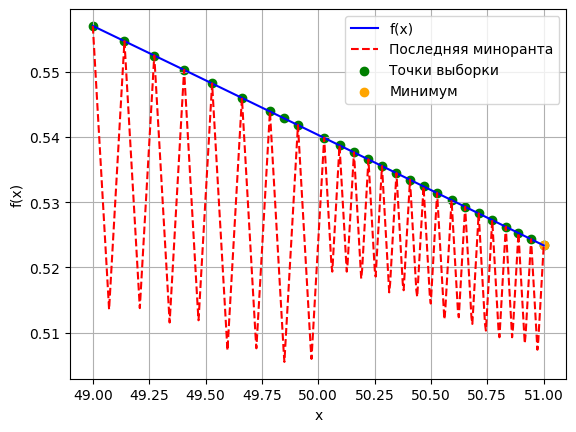

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x)
def f(x):
    return (0.1 * x - 5) ** 8 + np.cos(0.02 * x)

# Интервал [a, b] и точность epsilon
a, b = 49, 51
eps = 0.02

# приближенное значение константы Липшица M 
M = 0.604

# Визуализация функции f(x)
x_vals = np.linspace(a, b, 500)
y_vals = f(x_vals)

# Инициализация начальных точек
xi = [a, b]
yi = [f(a), f(b)]

# Функция для вычисления миноранты φ_i(x)
def phi(x, xi, yi, M):
    return max([yi[j] - M * abs(x - xi[j]) for j in range(len(xi))])

# Массивы для хранения точек миноранты
phi_vals = []

# Основной цикл метода ломаных
iteration = 0
while True:
    # Вычисляем миноранту на всем интервале
    phi_current = [phi(x, xi, yi, M) for x in x_vals]
    
    # Находим точку, где миноранта минимальна (argmin φ_i(x))
    x_new = x_vals[np.argmin(phi_current)]
    y_new = f(x_new)
    
    # Добавляем новую точку в список
    xi.append(x_new)
    yi.append(y_new)
    
    # Сохраняем текущие значения миноранты для отображения
    phi_vals.append(phi_current)
    
    # Проверка условия остановки
    if abs(min(yi) - min(phi_current)) <= eps:
        break
    
    iteration += 1

# Минимум функции
min_x = xi[np.argmin(yi)]
min_y = min(yi)

# Вывод результатов
print(f"Минимум функции f(x) ≈ {min_y} при x ≈ {min_x}")
print(f"Количество итераций: {iteration}")

# Построение графика
plt.plot(x_vals, y_vals, label='f(x)', color='blue')

# Построение последней миноранты
plt.plot(x_vals, phi_vals[-1], label='Последняя миноранта', linestyle='--', color='red')

# Точки выборки
plt.scatter(xi, yi, color='green', label='Точки выборки')

# Минимум функции
plt.scatter([min_x], [min_y], color='orange', label='Минимум')

# Оформление графика
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
